[View in Colaboratory](https://colab.research.google.com/github/kyokicchi/python_textAnalysis/blob/master/textAnalysis.ipynb)

colaboratoryファイル入出力関係

from google.colab import files

ファイルをアップロードする方法
uploaded = files.upload()

ダウンロードする方法
files.download('ファイル名')

In [9]:
!apt-get -y install fonts-ipafont-gothic

!pip install bs4

!pip install janome

!pip install wordcloud

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 8,248 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 fonts-ipafont-gothic all 00303-17ubuntu1 [3,523 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/universe amd64 fonts-ipafont-mincho all 00303-17ubuntu1 [4,725 kB]
Fetched 8,248 kB in 1s (7,176 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-17ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-17ubuntu1) ...
Selecting previously unselected package fonts-ipaf

In [0]:
#html を取得してくる
!
import urllib.request

url = 'https://www.aozora.gr.jp/cards/000035/files/301_14912.html'
html = urllib.request.urlopen(url).read()

In [0]:
#テキストにParse
import bs4
 
soup = bs4.BeautifulSoup(html, "html.parser")
texts = [x_.text.replace('\r', '').replace('\u3000', '') for x_ in soup.select(".main_text")]

open('raw.txt', 'w', encoding='utf-8').writelines(texts)


In [0]:
#単語に分割、形式を整える

from janome.charfilter import *
from janome.analyzer import Analyzer
from janome.tokenizer import Tokenizer
from janome.tokenfilter import *

texts = open('raw.txt', 'r', encoding='utf-8').readlines()
texts = [text_.replace('\n', '') for text_ in texts]

tokenizer = Tokenizer()


char_filters = [UnicodeNormalizeCharFilter(),         
                RegexReplaceCharFilter('\(', ''),     
                RegexReplaceCharFilter('\)', '')  
                ]

class NumericReplaceFilter(TokenFilter):

    def apply(self, tokens):
        for token in tokens:
            parts = token.part_of_speech.split(',')
            if (parts[0] == '名詞' and parts[1] == '数'):
                token.surface = '0'
                token.base_form = '0'
                token.reading = 'ゼロ'
                token.phonetic = 'ゼロ'
            yield token


class OneCharacterReplaceFilter(TokenFilter):

    def apply(self, tokens):
        for token in tokens:
            if re.match('^[あ-んア-ンa-zA-Z0-9ー]$', token.surface):
                continue

            yield token


token_filters = [NumericReplaceFilter(),
                 CompoundNounFilter(),
                 POSKeepFilter(['名詞', '動詞', '形容詞', '副詞']),
                 LowerCaseFilter(),
                 OneCharacterReplaceFilter()
                 ]

analyzer = Analyzer(char_filters, tokenizer, token_filters)


tokens_list = []
raw_texts = []
for text in texts:
    text_ = [token.base_form for token in analyzer.analyze(text)]
    if len(text_) > 0:
        tokens_list.append(text_)
        raw_texts.append(text)

In [0]:

raw_texts = [text_+'\n' for text_ in raw_texts]
open('editted.txt', 'w', encoding='utf-8').writelines(raw_texts)    

In [0]:

words = []
for text in tokens_list:
    words.extend([word+'\n' for word in text if word != ''])

open('wordslist.txt', 'w', encoding='utf-8').writelines(words)

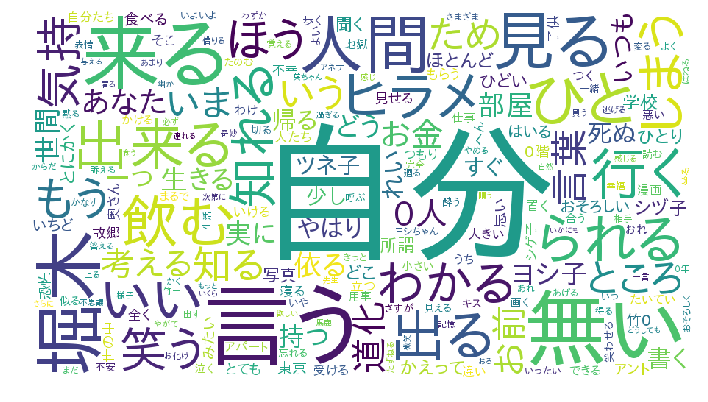

In [35]:
#単語リストからワードクラウド作成

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib

text = open('wordslist.txt', 'r', encoding='utf-8').readlines()
text = ' '.join(text).replace('\n', '')

stop_words = [u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
              u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した', u'思う', \
              u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て', u'に', u'を', u'は', u'の', u'が', u'と', u'た', u'し', u'で', \
              u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', u'', u'もの', u'もつ']


fpath = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'

wordcloud = WordCloud(background_color="white",
                      font_path=fpath,
                      width=900,
                      height=500,
                      stopwords=set(stop_words)).generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.savefig('cloud.png')
plt.show()




In [0]:
#ワードクラウドの画像をダウンロードする場合

from google.colab import files

files.download('cloud.png')